In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
raw_df = pd.read_csv("/content/BostonHousing.csv")

In [ ]:
print(raw_df.info())
print(raw_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6

In [ ]:
dataset= raw_df.copy()

In [ ]:
dataset_stats = dataset.describe()
dataset_stats.pop("MEDV")
dataset_stats = dataset_stats.transpose()

label_data= dataset.pop('MEDV')

In [ ]:
def min_max_norm(x):
  return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

normed_train_data = min_max_norm(dataset)

X_train1, X_test, Y_train1, Y_test = train_test_split(
    normed_train_data, label_data, test_size = 0.2, shuffle= False)
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train1, Y_train1, test_size= 0.2, shuffle= False)

print('x train')
print(X_train)
print('label train')
print(Y_train)

x train
         CRIM    ZN     INDUS  CHAS  ...       TAX   PTRATIO         B     LSTAT
0    0.000000  0.18  0.067815   0.0  ...  0.208015  0.287234  1.000000  0.089680
1    0.000236  0.00  0.242302   0.0  ...  0.104962  0.553191  1.000000  0.204470
2    0.000236  0.00  0.242302   0.0  ...  0.104962  0.553191  0.989737  0.063466
3    0.000293  0.00  0.063050   0.0  ...  0.066794  0.648936  0.994276  0.033389
4    0.000705  0.00  0.063050   0.0  ...  0.066794  0.648936  1.000000  0.099338
..        ...   ...       ...   ...  ...       ...       ...       ...       ...
318  0.004448  0.00  0.346041   0.0  ...  0.223282  0.617021  0.995739  0.238135
319  0.005273  0.00  0.346041   0.0  ...  0.223282  0.617021  0.998311  0.303532
320  0.001813  0.00  0.253666   0.0  ...  0.190840  0.744681  1.000000  0.150938
321  0.001970  0.00  0.253666   0.0  ...  0.190840  0.744681  1.000000  0.141832
322  0.003876  0.00  0.253666   0.0  ...  0.190840  0.744681  1.000000  0.164735

[323 rows x 13 colu

In [ ]:
input_layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
x = tf.keras.layers.Dense(300, activation='sigmoid')(x)
output_layer = tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_10 (Dense)             (None, 300)               30300     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 301       
Total params: 36,401
Trainable params: 36,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer= tf.keras.optimizers.SGD(learning_rate=0.04)
loss= tf.keras.losses.mean_absolute_error
metrics= tf.keras.metrics.RootMeanSquaredError()

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

In [ ]:
result= model.fit(X_train, Y_train, epochs= 2000, batch_size=100, validation_data=(X_val, Y_val))

Epoch 1/2000
4/4 [==============================] - 0s 54ms/step - loss: 22.9157 - root_mean_squared_error: 24.6943 - val_loss: 8.9362 - val_root_mean_squared_error: 12.5557
Epoch 2/2000
4/4 [==============================] - 0s 8ms/step - loss: 10.1891 - root_mean_squared_error: 13.4370 - val_loss: 7.5727 - val_root_mean_squared_error: 10.3369
Epoch 3/2000
4/4 [==============================] - 0s 7ms/step - loss: 6.2748 - root_mean_squared_error: 9.0691 - val_loss: 7.3490 - val_root_mean_squared_error: 10.1777
Epoch 4/2000
4/4 [==============================] - 0s 8ms/step - loss: 6.3340 - root_mean_squared_error: 9.1663 - val_loss: 7.8190 - val_root_mean_squared_error: 10.5042
Epoch 5/2000
4/4 [==============================] - 0s 7ms/step - loss: 6.2567 - root_mean_squared_error: 9.0073 - val_loss: 8.6792 - val_root_mean_squared_error: 11.0509
Epoch 6/2000
4/4 [==============================] - 0s 7ms/step - loss: 6.3382 - root_mean_squared_error: 8.9121 - val_loss: 8.3023 - val_ro

In [ ]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


16/16 [==============================] - 0s 1ms/step - loss: 2.7295 - root_mean_squared_error: 4.4523

 Test rmse: 4.4523


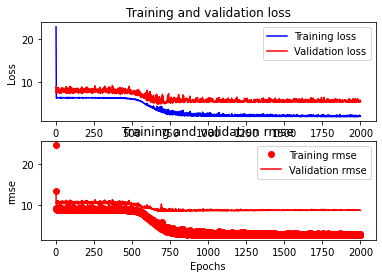

In [ ]:
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 mean_absolute_error val_mean_absolute_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error val_mean_absolute_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(normed_train_data, label_data)[1]))

plt.show()